# Analyzer of Stocks


## Libraries


In [1]:
# Import necessary libraries
from dotenv import load_dotenv
from libs import indicators, signals
import alpaca_trade_api as trade_api
import os
import pandas as pd
import matplotlib.pyplot as plt


## Alpaca Connection


In [2]:
load_dotenv()


True

In [3]:
# Get keys and URL for Alpaca API
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')
alpaca_paper_trade_url = os.getenv('APCA_API_PAPER_URL')


In [4]:
# Instantiate Alpaca connection
alpaca = trade_api.REST(alpaca_key, alpaca_secret_key, base_url=alpaca_paper_trade_url)


In [5]:
# Default parameters
ticker = 'TWOU'

today = pd.Timestamp('today')
today_date = f'{today:%Y-%m-%d}'

start_date = pd.Timestamp('2018-01-01', tz='America/New_York').isoformat()

end_date = pd.Timestamp(today_date, tz='America/New_York').isoformat()

timeframe = '1D'


In [6]:
# Get dataframe of ticker data
df_ohlcv_original = alpaca.get_bars(ticker, timeframe, start=start_date, end=end_date).df

# Copy of original dataframe
df_ohlcv = df_ohlcv_original.copy()


## Bollinger Bands


In [7]:
# Generate Bollinger Band data
df_updated = indicators.bollinger_band_generator(df_ohlcv)


## Keltner Channels


In [8]:
# Generate average true range values
df_updated = indicators.keltner_channel_generator(df_updated)


## EWMA (Fast and Slow)


In [9]:
# Generate ewma values
# Default fast = 12 and slow = 25.  Increase sensitivity: fast = 5 and slow = 35
df_updated = indicators.ewma_generator(df_updated, 5, 35)


## MACD 


In [10]:
# Generate macd values
df_updated = indicators.macd_generator(df_updated)


In [11]:
# Drop nan values
df_updated.dropna(inplace=True)


## Bollinger Bands and Keltner Channels Indicators Plot


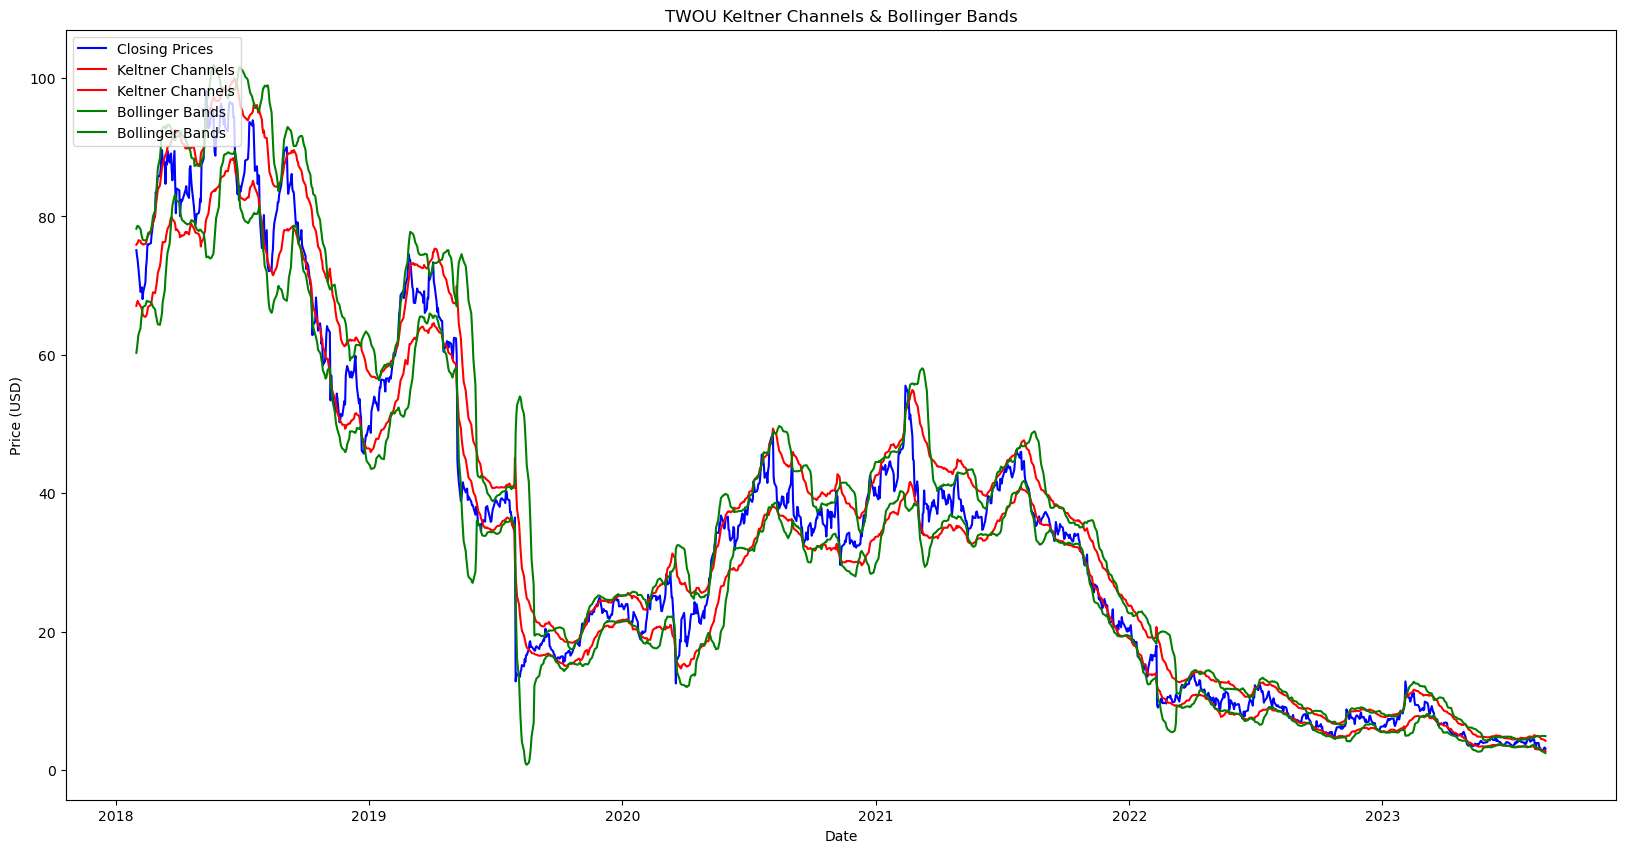

In [12]:
# Generate Keltner Channels and Bollinger Bands plot
plt.figure(figsize=(20,10))
plt.title(f'{ticker} Keltner Channels & Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df_updated[['close']], color='b', label='Closing Prices')
plt.plot(df_updated[['kc_upper', 'kc_lower']], color="r", label='Keltner Channels')
plt.plot(df_updated[['bb_upper', 'bb_lower']], color="g", label='Bollinger Bands')
plt.legend(loc='upper left')


## Exponential Weighted Moving Average (EWMA) Plot


<Axes: title={'center': 'EWMA Fast and Slow'}, xlabel='Date', ylabel='Price (USD)'>

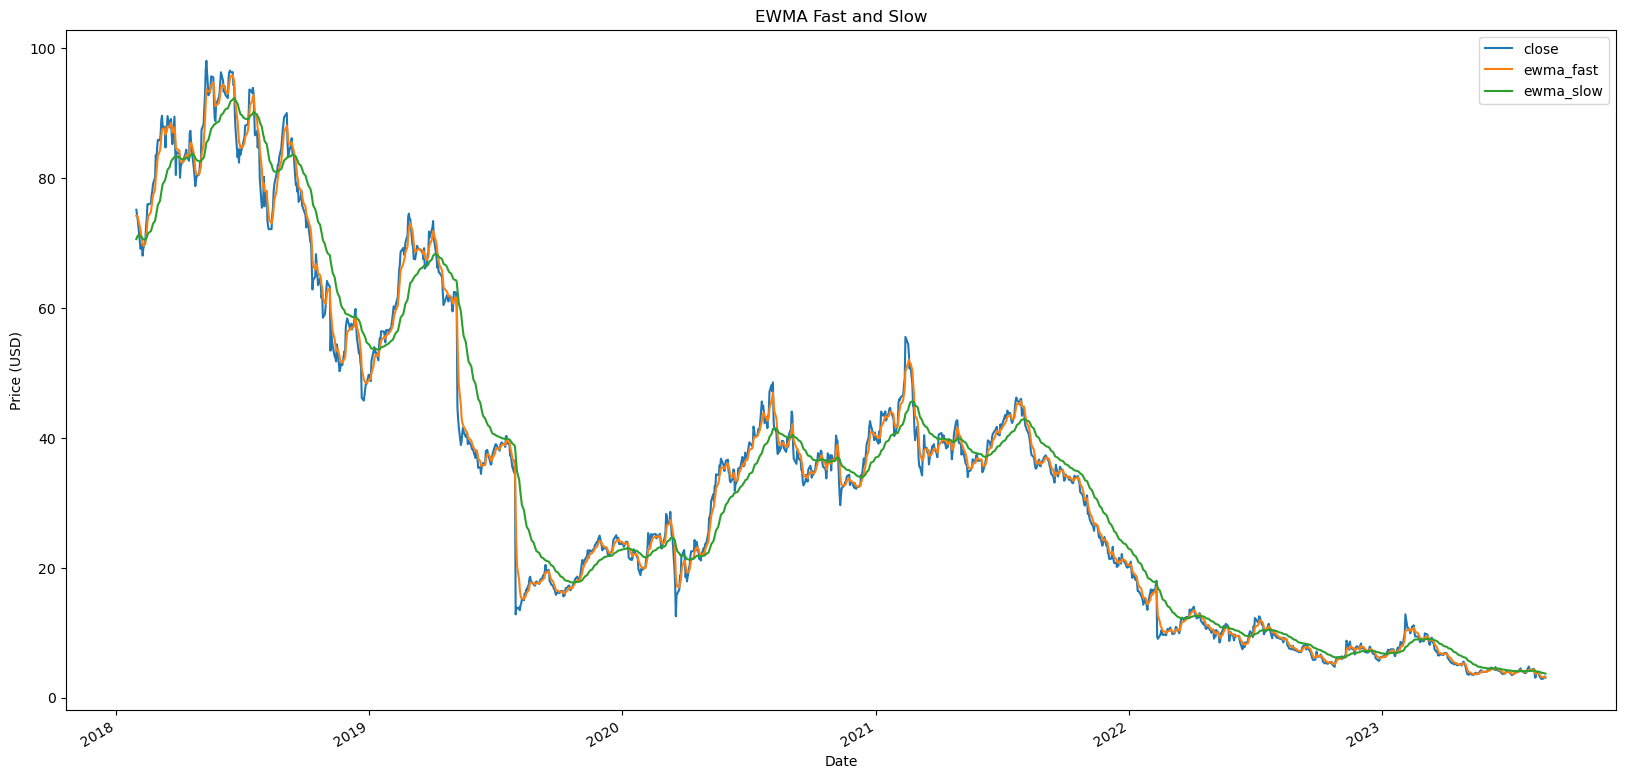

In [13]:
# Generate MACD Fast and Slow plot
df_updated[['close', 'ewma_fast', 'ewma_slow']].plot(figsize=(20,10), title='EWMA Fast and Slow', xlabel='Date', ylabel='Price (USD)')


In [14]:
df_updated = signals.bbands_inside_kchannels(df_updated)
df_updated = signals.ewma_crossovers(df_updated)
df_updated = signals.macd(df_updated, 5)


## MACD Signals


<Axes: title={'center': 'MACD Signal With Divergence'}, xlabel='Date', ylabel='Amount of Divergence'>

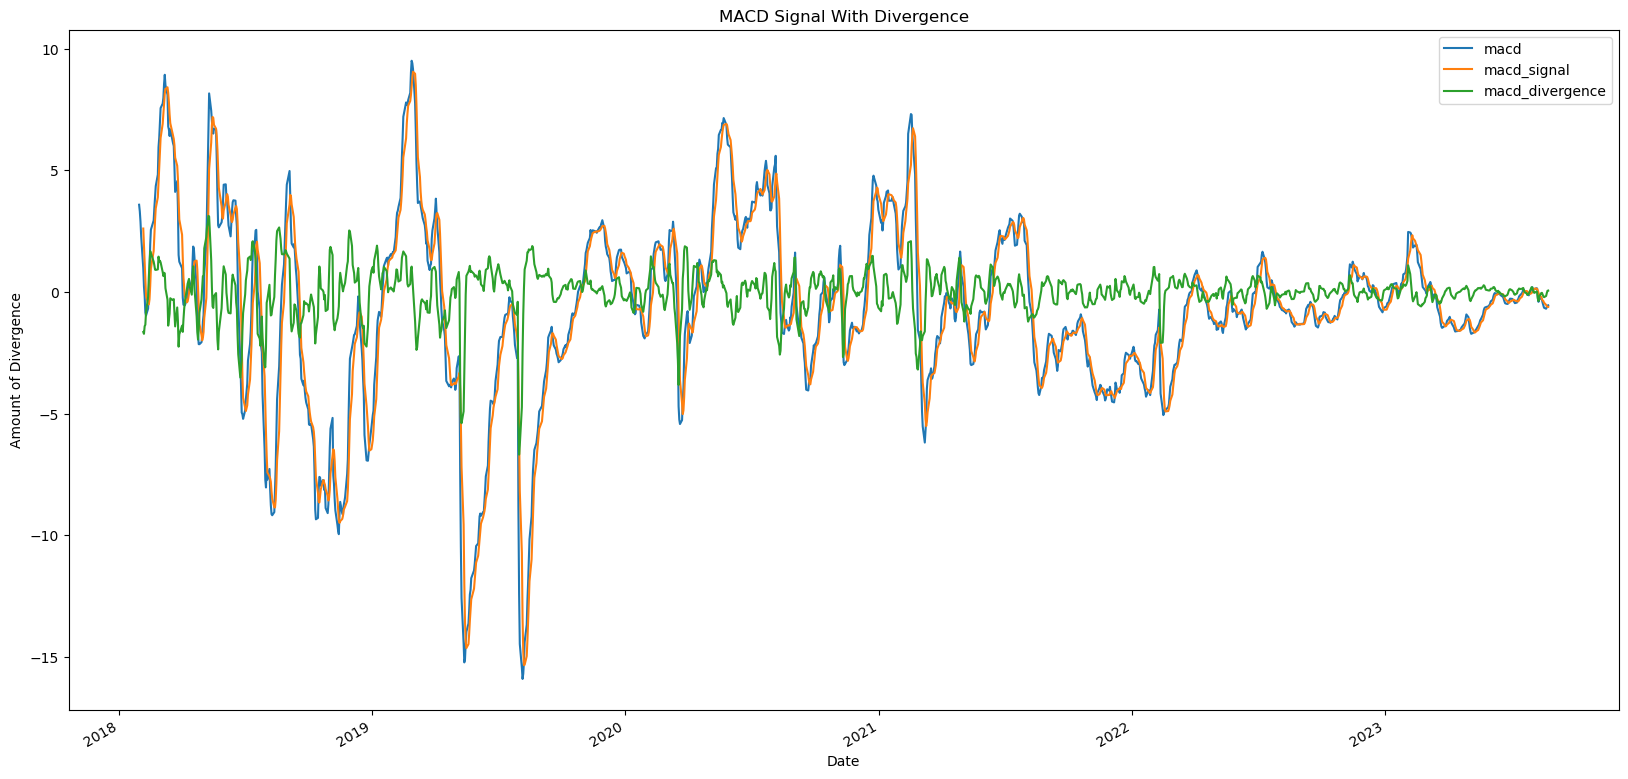

In [15]:
# Generate MACD with signal and divergence lines
df_updated[['macd', 'macd_signal', 'macd_divergence']].plot(figsize=(20,10), title='MACD Signal With Divergence', xlabel='Date', ylabel='Amount of Divergence')


In [16]:
# Drop nan values
df_updated.dropna(inplace=True)


In [17]:
# Display dataframe
df_updated.head(10)


,open,high,low,close,volume,bb_upper,bb_middle,bb_lower,atr,kc_upper,kc_middle,kc_lower,ewma_fast,ewma_slow,macd,bbkc_squeeze,ewma_crossover_signal,macd_signal,macd_divergence
timestamp,,,,,,,,,,,,,,,,,,,
2018-02-05 05:00:00+00:00,71.52,72.7800,69.090,69.10,522583,78.174679,71.0200,63.865321,2.362821,76.463438,71.737795,67.012152,72.033674,71.056784,0.976890,0.0,0.0,2.614448,-1.637558
2018-02-06 05:00:00+00:00,67.23,69.9300,66.700,69.43,517025,77.566982,71.3235,65.080018,2.312725,76.123846,71.498395,66.872944,71.165749,70.937936,0.227812,0.0,0.0,1.941477,-1.713665
2018-02-07 05:00:00+00:00,69.38,70.6399,68.760,69.76,342789,77.094653,71.5665,66.038347,2.365809,76.051200,71.319581,66.587962,70.697153,70.853360,-0.156207,0.0,-1.0,1.245511,-1.401718
2018-02-08 05:00:00+00:00,69.92,70.8588,68.030,68.06,275181,76.710693,71.6985,66.686307,2.526508,76.039848,70.986833,65.933817,69.818087,70.656002,-0.837915,0.0,0.0,0.499414,-1.337329
2018-02-09 05:00:00+00:00,68.68,70.3300,66.390,69.14,348553,76.578040,71.7705,66.962960,2.570358,75.940300,70.799584,65.658868,69.592055,70.550486,-0.958430,0.0,0.0,-0.149570,-0.808860
2018-02-12 05:00:00+00:00,69.45,71.4500,68.491,70.42,224351,76.539254,71.8255,67.111746,2.643883,76.049100,70.761333,65.473566,69.868039,70.541529,-0.673490,0.0,0.0,-0.479646,-0.193844
2018-02-13 05:00:00+00:00,69.98,73.2800,69.980,72.66,202743,76.541087,72.0085,67.475913,2.635477,76.222563,70.951608,65.680654,70.798697,70.685059,0.113639,0.0,1.0,-0.502481,0.616120
2018-02-14 05:00:00+00:00,71.87,74.3100,71.750,73.74,423640,76.652234,72.2220,67.791766,2.706529,76.642721,71.229663,65.816605,71.779135,70.889541,0.889594,0.0,0.0,-0.293321,1.182915
2018-02-15 05:00:00+00:00,74.62,76.8280,73.480,75.99,462684,77.164076,72.4770,67.789924,2.660314,77.022869,71.702241,66.381612,73.182760,71.227099,1.955661,0.0,0.0,0.265395,1.690266
